Mission Statement Analysis:
Do mission statements at educational institutions differ based on the total cost of attendance?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
plt.style.use('ggplot')

Using IPEDS, I downloaded a dataset as a csv and renamed it ed_ms1.csv in order to load into pandas.

In [3]:
df = pd.read_csv('ed_ms1.csv')

In [4]:
df.head()

,UnitID,Institution Name,Mission statement (IC2019mission),Mission statement URL (if mission statement not provided) (IC2019mission),Total price for in-state students living on campus 2019-20 (DRVIC2019),Sector of institution (HD2019),Unnamed: 6
0,177834,A T Still University of Health Sciences,NaN,www.atsu.edu/contact/about-atsu#Mission-Vision...,NaN,2,NaN
1,222178,Abilene Christian University,NaN,www.acu.edu/about/past-present-future/who-we-a...,51887.0,2,NaN
2,138558,Abraham Baldwin Agricultural College,NaN,https://www.abac.edu/about-abac/#our-vision,15479.0,1,NaN
3,451079,Academy for Five Element Acupuncture,NaN,acupuncturist.edu/about-the-academy/mission-vi...,NaN,2,NaN
4,457271,Academy for Jewish Religion-California,NaN,https://ajrca.edu,NaN,2,NaN


In [5]:
df.shape

(2486, 7)

In [6]:
df.columns

Index(['UnitID', 'Institution Name', 'Mission statement (IC2019mission)',
       'Mission statement URL (if mission statement not provided) (IC2019mission)',
       'Total price for in-state students living on campus 2019-20 (DRVIC2019)',
       'Sector of institution (HD2019)', 'Unnamed: 6'],
      dtype='object')

Here I create a subset of the data, only including institutions who have a mission statement on IPEDS. The subset includes 581 rows from the original 2486. 

In [7]:
df_ms = df.dropna(subset=['Mission statement (IC2019mission)']).drop(columns=['Unnamed: 6'])

In [8]:
df_ms

,UnitID,Institution Name,Mission statement (IC2019mission),Mission statement URL (if mission statement not provided) (IC2019mission),Total price for in-state students living on campus 2019-20 (DRVIC2019),Sector of institution (HD2019)
6,384306,Acupuncture and Integrative Medicine College-B...,The mission of Acupuncture & Integrative Medic...,NaN,NaN,2
11,168528,Adrian College,Adrian College a liberal arts college in the ...,NaN,54829.0,2
18,102580,Alaska Bible College,The purpose of Alaska Bible College is to exal...,NaN,20278.0,2
20,188526,Albany College of Pharmacy and Health Sciences,We educate the next generation of leaders to i...,NaN,51351.0,2
24,385415,Albert Einstein College of Medicine,Albert Einstein College of Medicine is a resea...,NaN,NaN,2
...,...,...,...,...,...,...
2476,493664,Yeshivat Hechal Shemuel,Yeshivat Hechal Shemuel seeks to train student...,NaN,NaN,2
2477,217040,Yeshivath Beth Moshe,The purpose is to establish maintain and con...,NaN,17300.0,2
2478,197735,Yeshivath Viznitz,Yeshivath Viznitz seek to train students in th...,NaN,18150.0,2
2479,197744,Yeshivath Zichron Moshe,YESHIVATH ZICHRON MOSHE seeks to train student...,NaN,21600.0,2


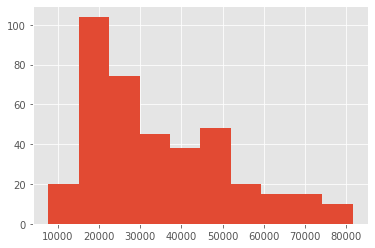

In [9]:
df_ms['Total price for in-state students living on campus 2019-20 (DRVIC2019)'].hist()

In [10]:
df_ms['Total price for in-state students living on campus 2019-20 (DRVIC2019)'].mean()

34500.61439588689

In [11]:
df_ms['Total price for in-state students living on campus 2019-20 (DRVIC2019)'].median()

29166.0

In [12]:
df_40plus = df_ms[df_ms['Total price for in-state students living on campus 2019-20 (DRVIC2019)'] > 40000]

In [13]:
df_40plus.shape

(132, 6)

In [14]:
df_40under = df_ms[df_ms['Total price for in-state students living on campus 2019-20 (DRVIC2019)'] <= 40000]

In [15]:
df_40under.shape

(257, 6)

In [16]:
def sort_dict(d):
    return {k: v for k, v in sorted(d.items(), key=lambda item: item[1], reverse=True)}

with open('stopwords.txt') as infile:
    stop_words = [word.strip() for word in infile.readlines()]

In [17]:
over40_dict = defaultdict(int)
for entry in df_40plus['Mission statement (IC2019mission)']:
    for word in entry.lower().split():
        if word not in stop_words:
            over40_dict[word] += 1
            
over40_dict = sort_dict(over40_dict)

In [18]:
under40_dict = defaultdict(int)
for entry in df_40under['Mission statement (IC2019mission)']:
    for word in entry.lower().split():
        if word not in stop_words:
            under40_dict[word] += 1
            
under40_dict = sort_dict(under40_dict)

In [19]:
df_split = pd.DataFrame([under40_dict, over40_dict], index=['under 40', 'over 40']).iloc[:,:100]

In [20]:
df_split.head()

,students,university,college,understanding,education,knowledge,scholarship,committed,learning,skills,...,community.,environment,torah,church,needs,comprehensive,seminary,sciences,service.,people
under 40,299,167,104,104,90,88,81,75,72,71,...,20,20,20,19,19,19,18,18,18,17
over 40,104,74,66,6,53,18,7,23,47,7,...,6,15,1,11,6,5,4,9,6,8


In [21]:
df_split.sum(axis=1)

under 40    4772.0
over 40     1452.0
dtype: float64

In [23]:
df_split_norm = df_split.copy()
for col in df_split_norm.columns:
    df_split_norm[col] = df_split_norm[col] / df_split.sum(axis=1)

In [24]:
df_split_norm.head()

,students,university,college,understanding,education,knowledge,scholarship,committed,learning,skills,...,community.,environment,torah,church,needs,comprehensive,seminary,sciences,service.,people
under 40,0.062657,0.034996,0.021794,0.021794,0.018860,0.018441,0.016974,0.015717,0.015088,0.014878,...,0.004191,0.004191,0.004191,0.003982,0.003982,0.003982,0.003772,0.003772,0.003772,0.003562
over 40,0.071625,0.050964,0.045455,0.004132,0.036501,0.012397,0.004821,0.015840,0.032369,0.004821,...,0.004132,0.010331,0.000689,0.007576,0.004132,0.003444,0.002755,0.006198,0.004132,0.005510


In [25]:
df_split_norm = df_split_norm.T

In [26]:
df_split_norm.sum()

under 40    1.0
over 40     1.0
dtype: float64

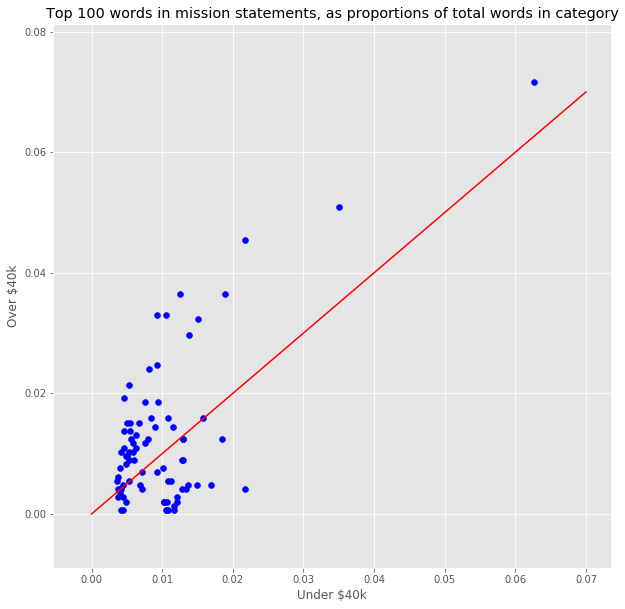

In [31]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(df_split_norm['under 40'], df_split_norm['over 40'], color='blue')
ax.plot([0,0.07], [0,0.07], color='red')
ax.set_xlabel('Under \$40k')
ax.set_ylabel('Over \$40k')
ax.set_title('Top 100 words in mission statements, as proportions of total words in category')
fig.savefig('top 100 words.png')

In [27]:
df_split_norm['difference'] = df_split_norm['over 40'] - df_split_norm['under 40']

In [28]:
top_over40_word_diff = df_split_norm.sort_values(by='difference', ascending=False)[:25]
top_under40_word_diff = df_split_norm.sort_values(by='difference')[:25]
top_under40_word_diff['difference'] = abs(top_under40_word_diff['difference'])

In [29]:
top_over40_word_diff.to_csv('over40.csv')
top_over40_word_diff

,under 40,over 40,difference
community,0.012573,0.036501,0.023928
liberal,0.009220,0.033058,0.023837
college,0.021794,0.045455,0.023661
arts,0.010478,0.033058,0.022580
education,0.018860,0.036501,0.017641
learning,0.015088,0.032369,0.017281
world.,0.005239,0.021350,0.016111
university,0.034996,0.050964,0.015968
professional,0.008173,0.024105,0.015932
mission,0.013831,0.029614,0.015784


In [30]:
top_under40_word_diff.to_csv('under40.csv')
top_under40_word_diff

,under 40,over 40,difference
understanding,0.021794,0.004132,0.017662
scholarship,0.016974,0.004821,0.012153
required,0.011735,0.000689,0.011046
value,0.011735,0.001377,0.010358
time,0.010897,0.000689,0.010208
moral,0.012154,0.002066,0.010088
skills,0.014878,0.004821,0.010058
larger,0.010687,0.000689,0.009999
state,0.010478,0.000689,0.009789
body,0.012154,0.002755,0.009399


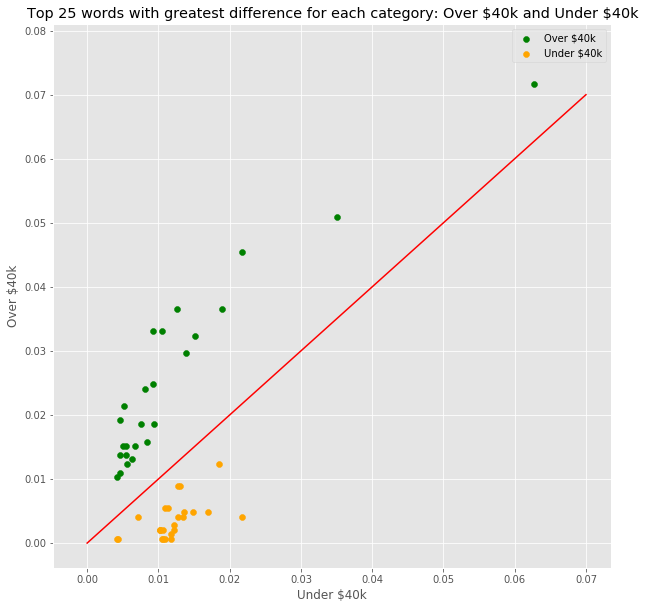

In [63]:
fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(top_over40_word_diff['under 40'], top_over40_word_diff['over 40'], color='green', label='Over $40k')
ax.scatter(top_under40_word_diff['under 40'], top_under40_word_diff['over 40'], color='orange', label='Under $40k')
ax.plot([0,0.07], [0,0.07], color='red')
ax.set_xlabel('Under $40k')
ax.set_ylabel('Over $40k')
ax.set_title('Top 25 words with greatest difference for each category: Over \$40k and Under \$40k')
ax.legend()
fig.savefig('greatest difference.png')